In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loguru import logger

import seaborn as sns

import pickle
import requests
import json
import re
from pathlib import Path

data_dir = Path(globals()["_dh"][0]).parent / "data"
figure_dir = data_dir / "figures" / "pareto_speedups"
figure_dir.mkdir(exist_ok=True)

plt.style.use("seaborn-bright")
plt.set_cmap("plasma")

<Figure size 432x288 with 0 Axes>

In [2]:
df

NameError: name 'df' is not defined

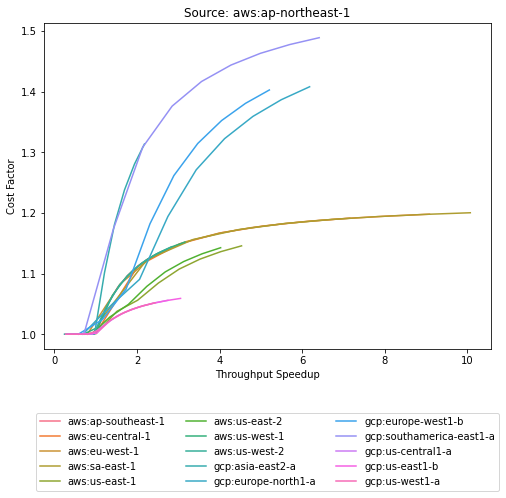

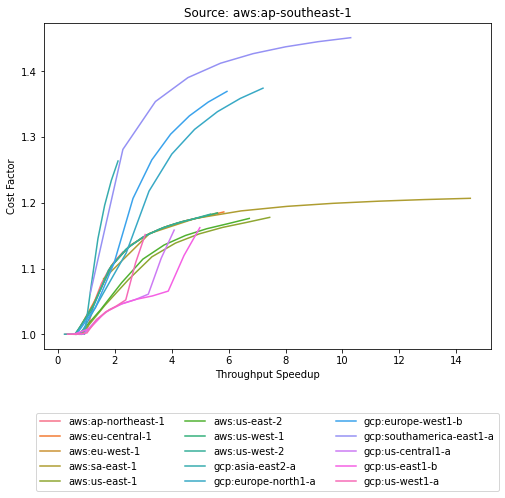

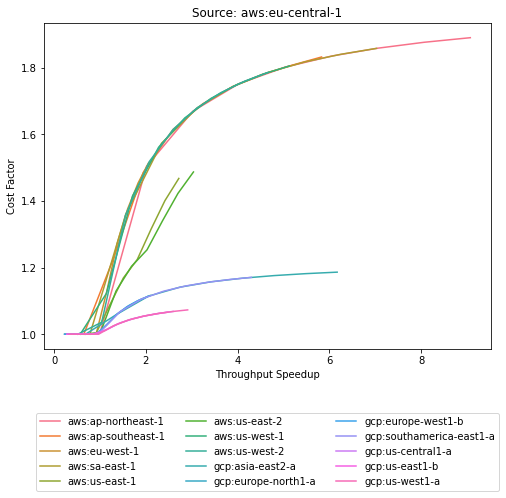

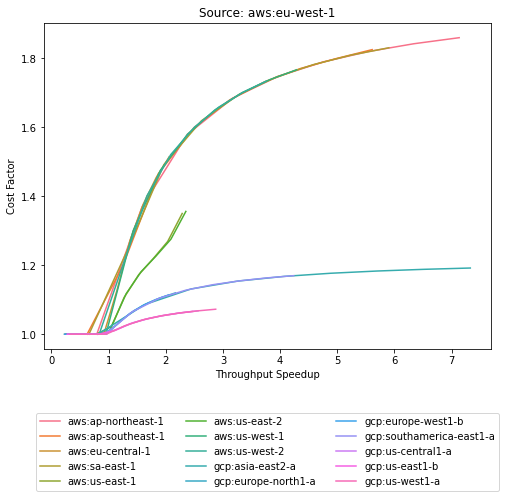

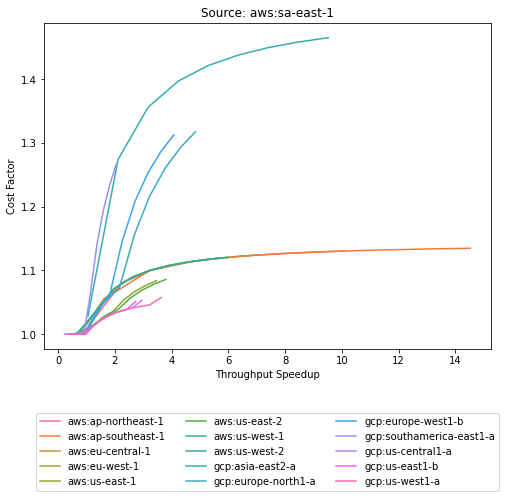

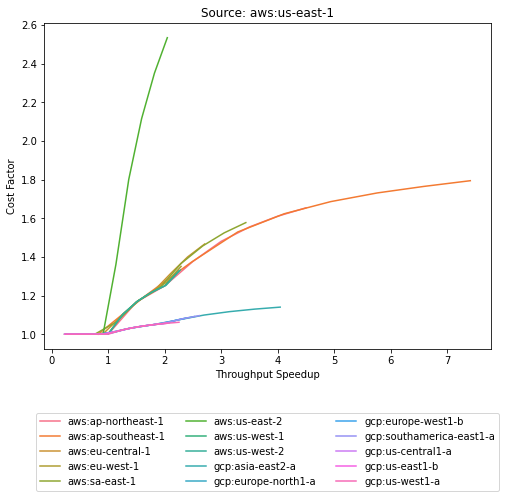

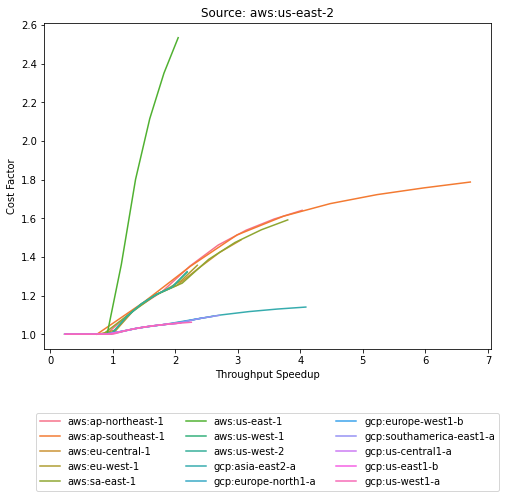

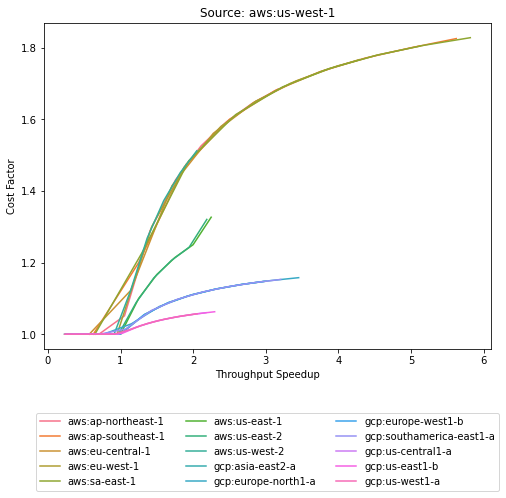

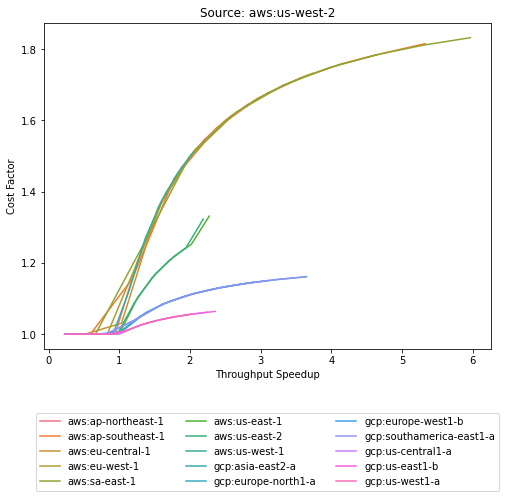

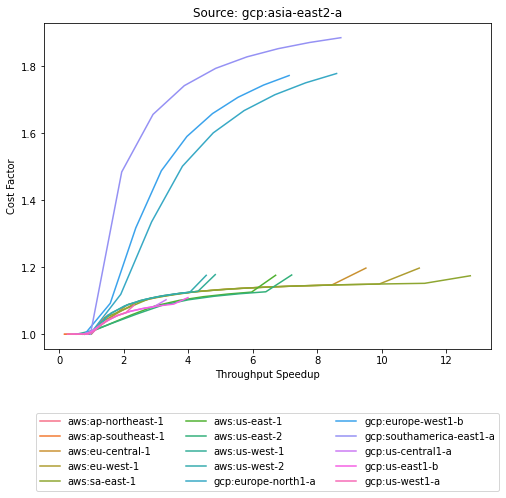

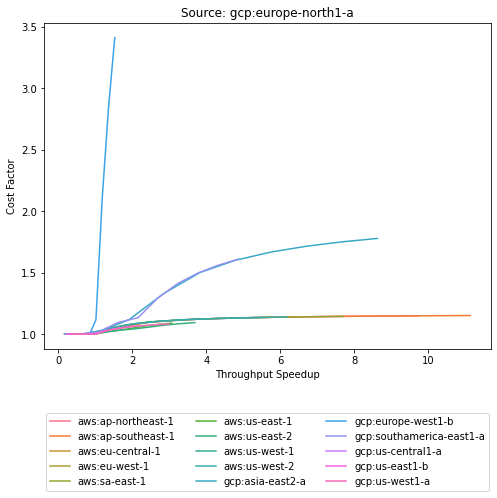

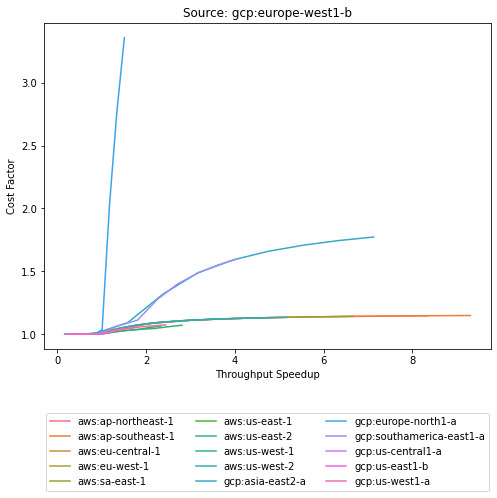

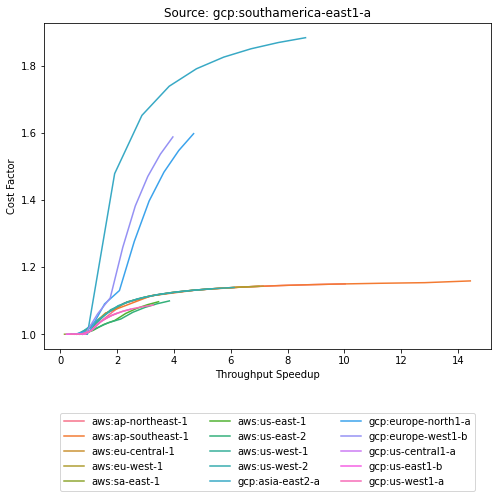

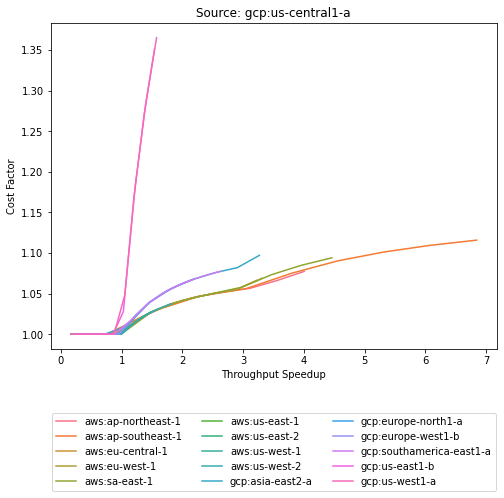

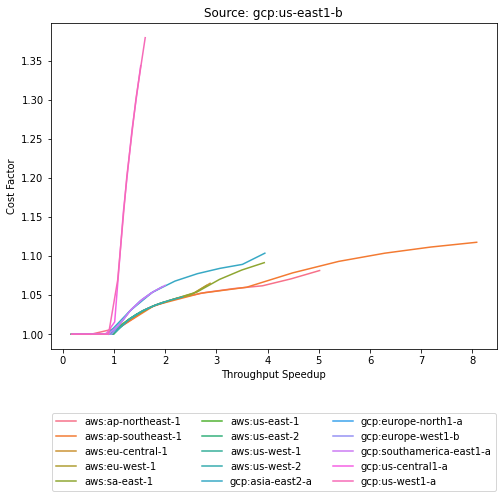

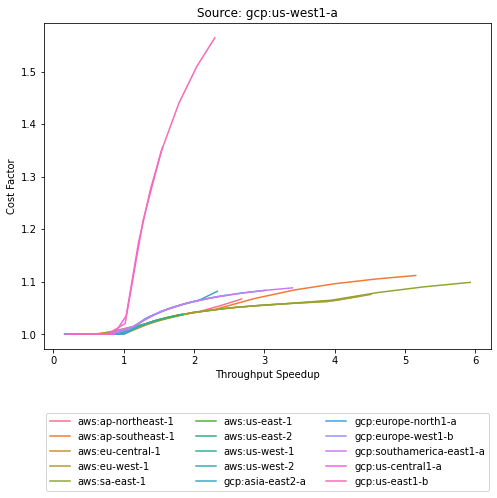

In [6]:
df = pd.read_csv("../data/pareto.csv")
# gcp:us-central1-c -> "gcp:us"
# aws:us-east-1 -> "aws:us"
df["src_region"] = df["src"].apply(lambda x: x.split("-")[0])
df["dst_region"] = df["dst"].apply(lambda x: x.split("-")[0])

# plot scatter w/ cost_factor vs throughput_speedup, color by src with legend
for src_region, df_src in df.groupby("src"):
    fig, ax = plt.subplots(figsize=(8, 6))
    # sort rows by cost factor
    df.sort_values(by="throughput_speedup", inplace=True)
    sns.lineplot(x="throughput_speedup", y="cost_factor", hue="dst", data=df_src, ax=ax)
    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.45), ncol=3)
    ax.set_xlabel("Throughput Speedup")
    ax.set_ylabel("Cost Factor")
    ax.set_title(f"Source: {src_region}")

    # white background (no transparency)
    fig.set_facecolor("white")

    fig.savefig(figure_dir / f"{src_region}.png", bbox_inches="tight", dpi=300)
    fig.savefig(figure_dir / f"{src_region}.pdf", bbox_inches="tight")